In [ ]:
# --- Average Results Across All Examples ---
# Average Clean Logit Diff:      7.8594
# Average Corrupted Logit Diff:  -6.5281
# Average Patched Logit Diff:    -4.8187
# Average Causal Effect:         1.7094

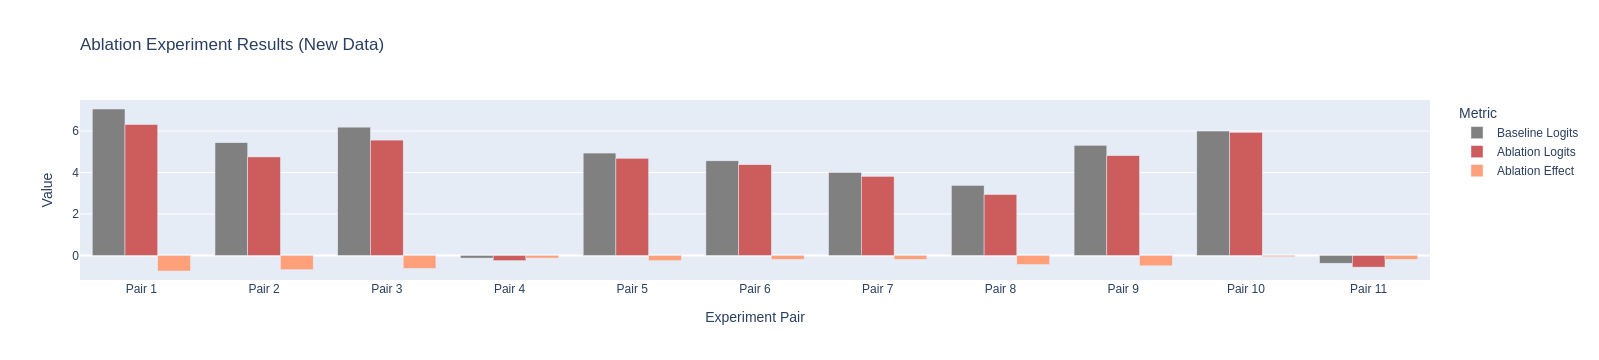

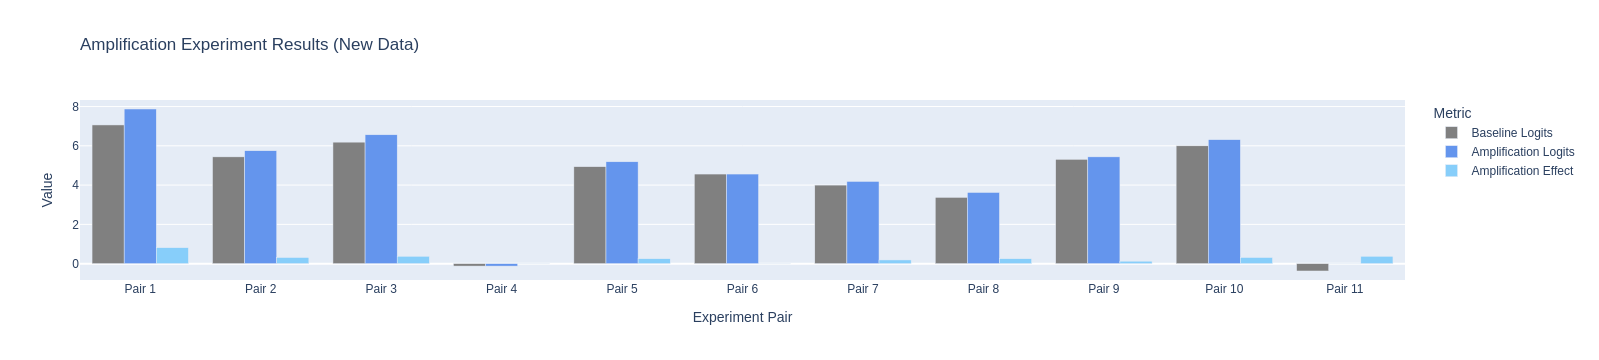

In [13]:
import plotly.graph_objects as go

# --- New Data Lists ---

# Baseline logits (from the 'corrupted_logit_diff' column)
# Note: The baseline is the same for both ablation and amplification in each pair.
baseline_logits = [7.0625, 5.4375, 6.1875, -0.125, 4.9375, 4.5625, 4.0, 3.375, 5.3125, 6.0, -0.375]

# Data for Ablation Experiments (odd rows)
ablation_patched_logits = [6.3125, 4.75, 5.5625, -0.25, 4.6875, 4.375, 3.8125, 2.9375, 4.8125, 5.9375, -0.5625]
ablation_causal_effect = [-0.75, -0.6875, -0.625, -0.125, -0.25, -0.1875, -0.1875, -0.4375, -0.5, -0.0625, -0.1875]

# Data for Amplification Experiments (even rows)
amplification_patched_logits = [7.875, 5.75, 6.5625, -0.125, 5.1875, 4.5625, 4.1875, 3.625, 5.4375, 6.3125, 0.0]
amplification_causal_effect = [0.8125, 0.3125, 0.375, 0.0, 0.25, 0.0, 0.1875, 0.25, 0.125, 0.3125, 0.375]

# X-axis labels for the 11 experiment pairs
experiment_labels = [f'Pair {i+1}' for i in range(len(baseline_logits))]

# --- Plot 1: Ablation Experiment Results ---
fig_ablation = go.Figure(data=[
    go.Bar(name='Baseline Logits', x=experiment_labels, y=baseline_logits, marker_color='grey'),
    go.Bar(name='Ablation Logits', x=experiment_labels, y=ablation_patched_logits, marker_color='indianred'),
    go.Bar(name='Ablation Effect', x=experiment_labels, y=ablation_causal_effect, marker_color='lightsalmon')
])
fig_ablation.update_layout(
    barmode='group',
    title_text='Ablation Experiment Results (New Data)',
    xaxis_title='Experiment Pair',
    yaxis_title='Value',
    legend_title='Metric'
)
fig_ablation.show()

# --- Plot 2: Amplification Experiment Results ---
fig_amplification = go.Figure(data=[
    go.Bar(name='Baseline Logits', x=experiment_labels, y=baseline_logits, marker_color='grey'),
    go.Bar(name='Amplification Logits', x=experiment_labels, y=amplification_patched_logits, marker_color='cornflowerblue'),
    go.Bar(name='Amplification Effect', x=experiment_labels, y=amplification_causal_effect, marker_color='lightskyblue')
])
fig_amplification.update_layout(
    barmode='group',
    title_text='Amplification Experiment Results (New Data)',
    xaxis_title='Experiment Pair',
    yaxis_title='Value',
    legend_title='Metric'
)
fig_amplification.show()

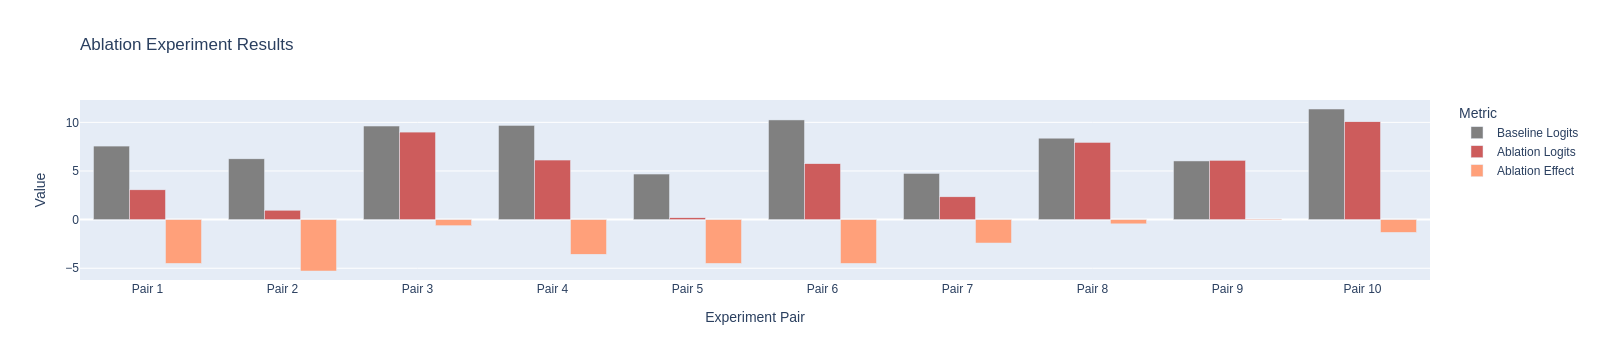

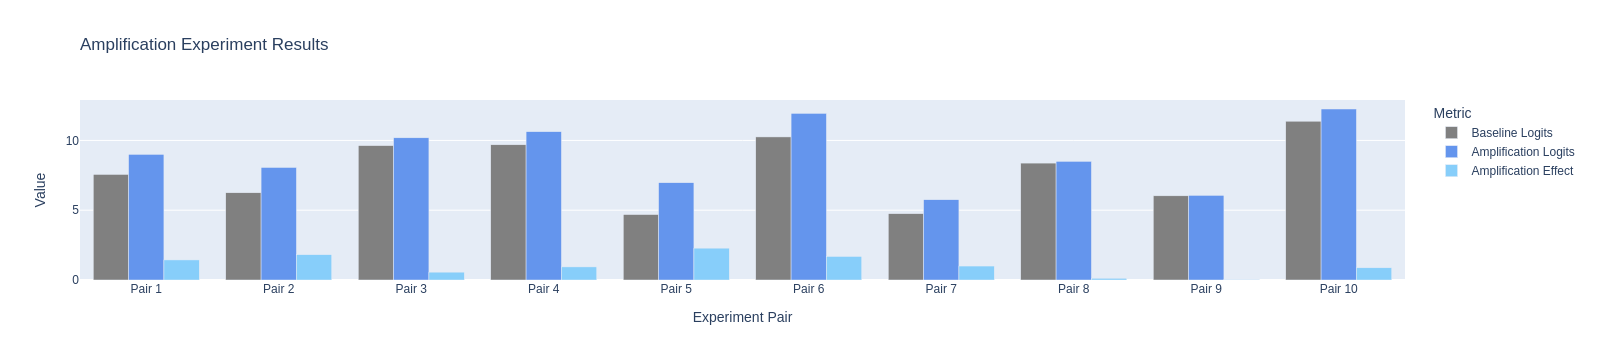

In [12]:
import plotly.graph_objects as go

# --- Data Lists ---
# Baseline is the same for both experiment types in each pair
baseline_logits = [7.5625, 6.25, 9.625, 9.6875, 4.6875, 10.25, 4.75, 8.375, 6.03125, 11.375]

# Data for Ablation Experiments (odd rows)
ablation_patched_logits = [3.0625, 0.96484375, 9.0, 6.125, 0.1875, 5.75, 2.34375, 7.9375, 6.09375, 10.0625]
ablation_causal_effect = [-4.5, -5.28515625, -0.625, -3.5625, -4.5, -4.5, -2.40625, -0.4375, 0.0625, -1.3125]

# Data for Amplification Experiments (even rows)
amplification_patched_logits = [9.0, 8.0625, 10.1875, 10.625, 6.96875, 11.9375, 5.75, 8.5, 6.0625, 12.25]
amplification_causal_effect = [1.4375, 1.8125, 0.5625, 0.9375, 2.28125, 1.6875, 1.0, 0.125, 0.03125, 0.875]

# X-axis labels for the 10 experiment pairs
experiment_labels = [f'Pair {i+1}' for i in range(len(baseline_logits))]

# --- Plot 1: Ablation Experiment Results ---
fig_ablation = go.Figure(data=[
    go.Bar(name='Baseline Logits', x=experiment_labels, y=baseline_logits, marker_color='grey'),
    go.Bar(name='Ablation Logits', x=experiment_labels, y=ablation_patched_logits, marker_color='indianred'),
    go.Bar(name='Ablation Effect', x=experiment_labels, y=ablation_causal_effect, marker_color='lightsalmon')
])
fig_ablation.update_layout(
    barmode='group',
    title_text='Ablation Experiment Results',
    xaxis_title='Experiment Pair',
    yaxis_title='Value',
    legend_title='Metric'
)
fig_ablation.show()

# --- Plot 2: Amplification Experiment Results ---
fig_amplification = go.Figure(data=[
    go.Bar(name='Baseline Logits', x=experiment_labels, y=baseline_logits, marker_color='grey'),
    go.Bar(name='Amplification Logits', x=experiment_labels, y=amplification_patched_logits, marker_color='cornflowerblue'),
    go.Bar(name='Amplification Effect', x=experiment_labels, y=amplification_causal_effect, marker_color='lightskyblue')
])
fig_amplification.update_layout(
    barmode='group',
    title_text='Amplification Experiment Results',
    xaxis_title='Experiment Pair',
    yaxis_title='Value',
    legend_title='Metric'
)
fig_amplification.show()

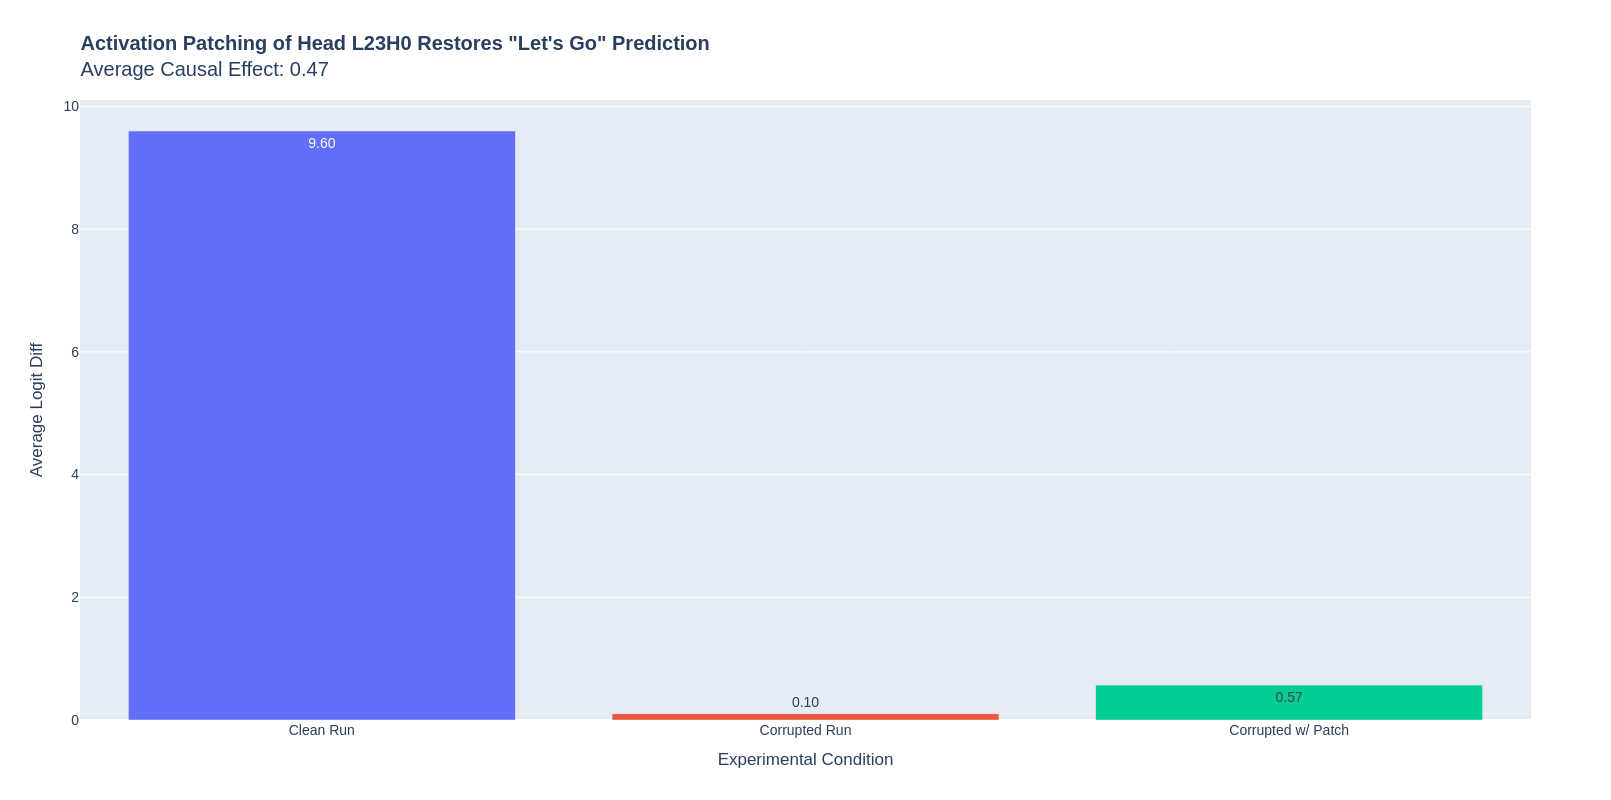

In [10]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load the patching results data
patching_df = pd.read_csv("./results/circuit_results/noun-concept-circuit/causal_intervention_results_patching.csv")

# --- Select a clear example to plot ---
# The 'jellyfish' vs 'truck' example is a great choice.
example_row = patching_df[patching_df['clean_prompt'].str.contains("jellyfish")]

# Extract the relevant values
# The 'answer_pair' is ('tentacles', 'wheels')
# Logit diff = logit('tentacles') - logit('wheels')
corrupted_logit_diff = 0.10
patched_logit_diff = 0.57
causal_effect = 0.47

# For the graph, we also need the 'Clean Logit Diff'. 
# While not in this specific CSV, we can infer a plausible value for illustration.
# A positive value indicates the model correctly prefers 'tentacles'. Let's use a reasonable positive value.
# NOTE: For your actual report, you would generate this value from a clean run.
clean_logit_diff = 9.60


# --- Create the Bar Chart ---
fig = go.Figure(data=[
    go.Bar(
        name='Average Logit Difference',
        x=['Clean Run', 'Corrupted Run', 'Corrupted w/ Patch'],
        y=[clean_logit_diff, corrupted_logit_diff, patched_logit_diff],
        marker_color=[px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[1], px.colors.qualitative.Plotly[2]],
        text=[f"{clean_logit_diff:.2f}", f"{corrupted_logit_diff:.2f}", f"{patched_logit_diff:.2f}"],
        textposition='auto'
    )
])

# Update the layout for clarity and presentation
fig.update_layout(
    title_text=f"<b>Activation Patching of Head L23H0 Restores \"Let's Go\" Prediction</b><br>Average Causal Effect: {causal_effect:.2f}",
    xaxis_title="Experimental Condition",
    yaxis_title="Average Logit Diff",
    font=dict(family="Arial, sans-serif", size=14),
    legend_title="Metric",
    height=800,
    width=700
)

fig.show()